### Problem set 3. Anastasia Makarova.

#### Task 1

Load the data. How many samples/features does it have? Determine the type of each feature (continuous or
categorical). What are possible values of each feature? Do the data contain any missing values? How much data
are missing? How many classes are in this problem? Can you say that the classes are more or less balanced?

In [2]:
import pandas as pd
import numpy as np

nmb_columns = 15

dtype = {'f1': np.str }

train_data = pd.read_csv('train.data', 
                         na_values="?", 
                         sep=',', 
                         engine='python', 
                         header=None)

train_labels = train_data[15]
train_data = train_data[np.arange(15)]
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,b,2783,1.540,u,g,w,v,3.750,t,t,5,t,g,0.000010,3
1,b,3317,1.040,u,g,r,h,6.500,t,f,0,t,g,0.000016,31285
2,a,2292,11.585,u,g,cc,v,0.040,t,f,0,f,g,0.000008,1349
3,b,5442,0.500,y,p,k,h,3.960,t,f,0,f,g,0.000018,314
4,b,4250,4.915,y,p,w,v,3.165,t,f,0,t,g,0.000005,1442


In [26]:
print 'Train dataset contains {0} samples and {1} columns'.format(train_data.shape[0], train_data.shape[1])

Train dataset contains 402 samples and 15 columns


In [28]:
train_data.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
dtype: object

$1,2,7,13$ - continuous float features, $10, 14$ - integer features,  the others are categorial.

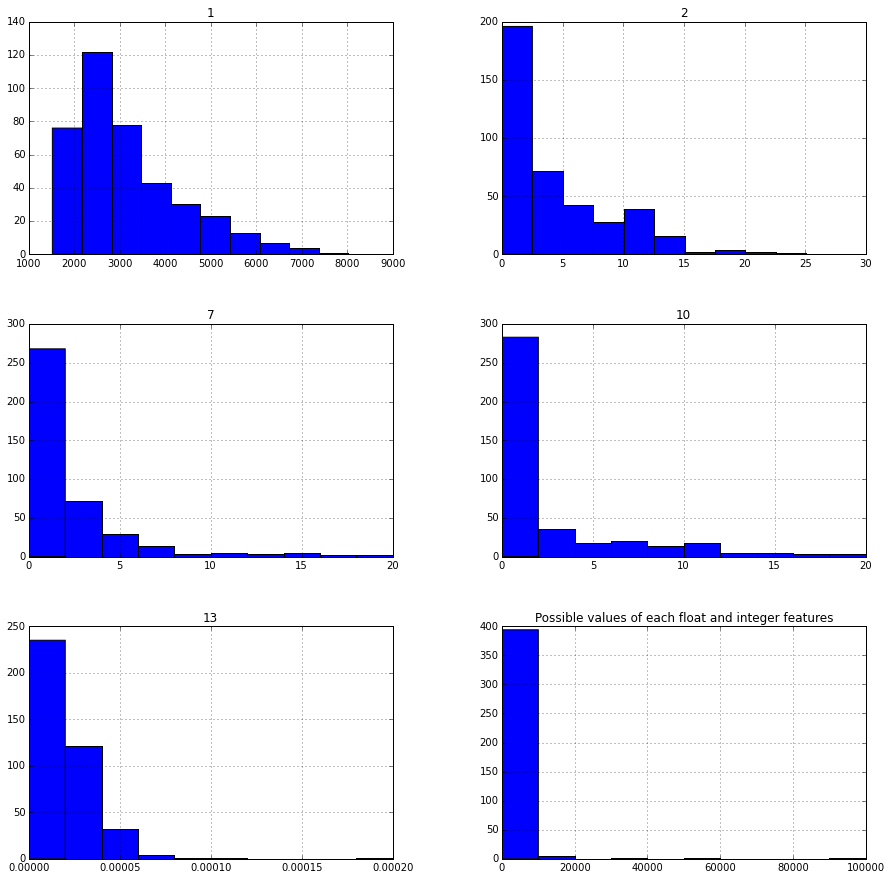

,1,2,7,10,13,14
count,397.000000,402.000000,402.000000,402.000000,395.000000,402.000000
mean,3164.735516,4.540535,2.085323,2.156716,0.000018,1137.875622
std,1195.768564,4.659156,3.143756,3.898055,0.000018,6038.564633
min,1517.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2267.000000,1.000000,0.210000,0.000000,0.000007,0.000000
50%,2825.000000,2.687500,1.000000,0.000000,0.000016,6.000000
75%,3750.000000,7.000000,2.500000,2.000000,0.000028,444.000000
max,8025.000000,25.085000,20.000000,20.000000,0.000200,100000.000000


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

train_data.hist(figsize=(15, 15))
plt.title("Possible values of each float and integer features")
plt.show()
train_data.describe()

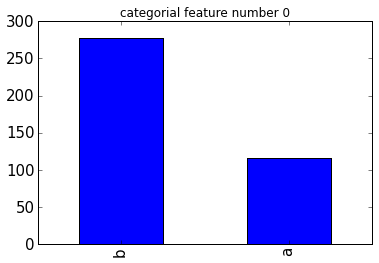

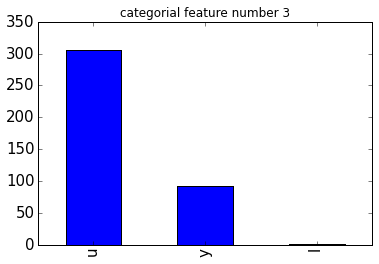

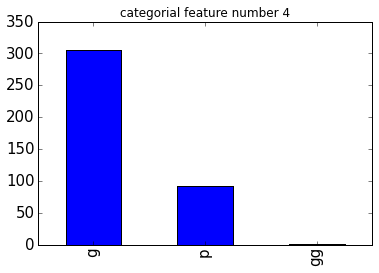

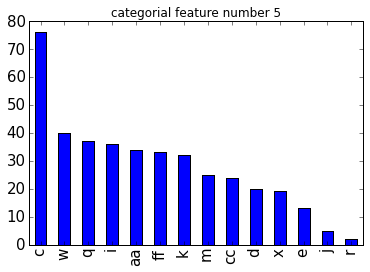

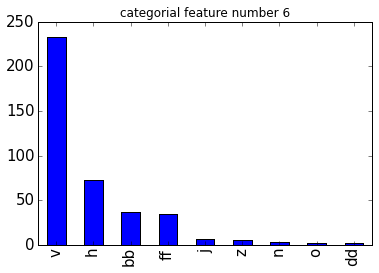

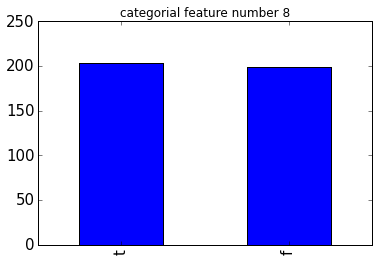

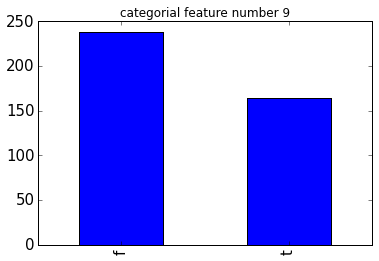

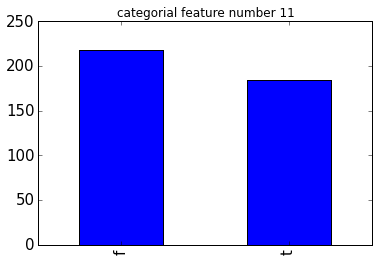

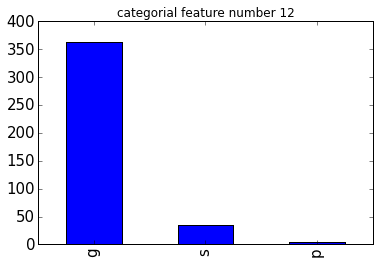

In [45]:
categorial = [0,3,4,5,6,8,9,11,12]
for i in categorial:
    train_data[i].value_counts().plot(kind='bar', title='categorial feature number %d' %i, fontsize = 15)
    plt.show()

In [65]:
if train_data.isnull().any().any():
    print('Data has missing values.')
else:
    print('Data has not missing values.\n')
print '\nThe total number of missing values:', train_data.isnull().sum(0).sum(0)    
print '\nFor each class they are:\n',train_data.isnull().sum(0), 



Data has missing values.

The total number of missing values: 38

For each class they are:
0     8
1     5
2     0
3     3
4     3
5     6
6     6
7     0
8     0
9     0
10    0
11    0
12    0
13    7
14    0
dtype: int64


First class size 175
Second class size 227
Ratio between "+" and "-" samples in the training set is 0.770925110132.
So, classes are balanced.


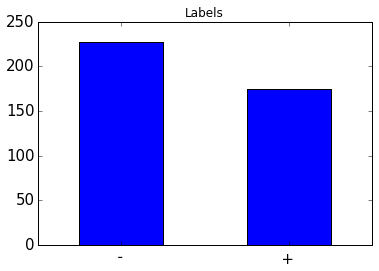

In [64]:
first_class_size = train_labels[train_labels == '+'].shape[0]
second_class_size = train_labels[train_labels == '-'].shape[0]

print 'First class size %d\nSecond class size %d' %(first_class_size, second_class_size) 

print('Ratio between "+" and "-" samples in the training set is {0}.\nSo, classes are balanced.'.format(float(first_class_size) / second_class_size))


train_labels.value_counts().plot(kind='bar', title='Labels', fontsize=15, rot=180)
plt.show()

In [32]:
test_data = pd.read_csv('test.data', 
                        na_values="?", 
                        sep=',', 
                        engine='python', 
                        header=None)

test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,b,3083,0.000,u,g,w,v,1.25,t,t,1,f,g,0.000020,0
1,a,5867,4.460,u,g,q,h,3.04,t,t,6,f,g,0.000004,560
2,a,2450,0.500,u,g,q,h,1.50,t,f,0,f,g,0.000028,824
3,b,2017,5.625,u,g,w,v,1.71,t,f,0,f,s,0.000012,0
4,b,3208,4.000,u,g,m,v,2.50,t,f,0,t,g,0.000036,0


### Task 2
* Since the data contain missing values, you have to do something about it. For the training data, you could simply
remove the samples with missing values. However, you cannot use this approach for the testing data because
you have to predict the label for each testing sample, even if it contains missing values. Therefore you need to
perform imputation for the testing test. (You may do imputation for the training set as well.)

Let's fill the gaps in numerical features and others features by fillna from pandas

In [4]:
print 'Before:', train_data.isnull().sum(0).sum()
train_data_filled = train_data.fillna(method='pad')
test_data_filled = test_data.fillna(method='pad')
print "After:", train_data_filled.isnull().sum(0).sum()

Before: 38
After: 0


### Task 3
* Prepare the data for a classification algorithm. You need to construct the design matrix X and the vector of
labels y that contain only numerical data. Do not forget to use one-hot encoding for categorical features!

In [5]:
from sklearn import preprocessing


def MakeNum(feature):
    values = np.unique(feature)
    numbers = dict(zip(values,range(len(values))))
    return feature.replace(numbers)


train_and_test = pd.concat((train_data_filled, test_data_filled))

categorical_features = train_data_filled.select_dtypes([object]).columns
for feature in categorical_features:
    train_and_test[feature] = MakeNum(train_and_test[feature])

print 'Current features:\n', train_and_test.head()

enc = preprocessing.OneHotEncoder(categorical_features = categorical_features)
full_features = enc.fit_transform(train_and_test)

train_features = train_and_test[:train_data.shape[0]]
test_features = train_and_test[train_data.shape[0]:]

print 'All features:\n', full_features.shape

Current features:
   0     1       2   3   4   5   6      7   8   9   10  11  12        13  \
0   1  2783   1.540   1   0  12   7  3.750   1   1   5   1   0  0.000010   
1   1  3317   1.040   1   0  11   3  6.500   1   0   0   1   0  0.000016   
2   0  2292  11.585   1   0   2   7  0.040   1   0   0   0   0  0.000008   
3   1  5442   0.500   2   2   8   3  3.960   1   0   0   0   0  0.000018   
4   1  4250   4.915   2   2  12   7  3.165   1   0   0   1   0  0.000005   

      14  
0      3  
1  31285  
2   1349  
3    314  
4   1442  
All features:
(690, 46)


/home/anastasia/anaconda/lib/python2.7/site-packages/pandas/core/index.py:2598: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = func(np.asarray(other))


### Task 4
Take the decision tree (DT) classifier from the sklearn module with default parameters. Estimate the accuracy
of this classifier using cross validation. Use the fraction of correctly predicted labels as an accuracy metric. Try to vary some parameters of the classifier. How does the accuracy change?

In [6]:
from sklearn import tree
from sklearn import cross_validation

def AccEstimate(clf, train_data, train_labels):
    scores = cross_validation.cross_val_score(clf, train_data, train_labels, cv = 5)

    print('Accuracy: {0} +/- {1}'.format(scores.mean(), scores.std() * 2))
    
    
clf = tree.DecisionTreeClassifier()
AccEstimate(clf, train_features, train_labels)

clf = tree.DecisionTreeClassifier(max_depth = 1)
AccEstimate(clf, train_features, train_labels)

clf = tree.DecisionTreeClassifier(criterion='entropy')
AccEstimate(clf, train_features, train_labels)


Accuracy: 0.761296296296 +/- 0.161195923942
Accuracy: 0.855925925926 +/- 0.276056022028
Accuracy: 0.776358024691 +/- 0.165270950626


### Task 5

Write the code that tunes the parameters of DT automatically using grid search. What are the best parameters?
What is the resulting accuracy? How much time does this grid search take?

In [18]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'], 
              'max_features': ['auto', 'sqrt', 'log2', None],
              'max_depth': list(range(20, 1000, 100)),
              'min_samples_leaf': list(range(1, 30, 5))}

clf = grid_search.GridSearchCV(tree.DecisionTreeClassifier(), parameters)

In [19]:
timing = %timeit -o clf.fit(X_normalized, train_labels)
params, mean, scores = clf.grid_scores_[0]

print('DT GridSearch {0} s.\n'.format(timing.best))
params, mean, scores = clf.grid_scores_[0]
print('Best score {1}  with parameters {0} .'.format(params, scores.max()))

1 loops, best of 3: 12.5 s per loop
DT GridSearch 12.5025169849 s.

Best score 0.761194029851  with parameters {'max_features': 'auto', 'splitter': 'best', 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1} .


### Task 6
Run the SVM classifier from the sklearn module with default parameters. What is its accuracy? Try to normalize
the features and see what changes.

In [12]:
from sklearn import svm, grid_search


clf = svm.SVC()
AccEstimate(clf, train_features, train_labels)

X_normalized = preprocessing.normalize(train_features, norm = 'l2')
clf = svm.SVC()
AccEstimate(clf, X_normalized, train_labels)

#scores = cross_validation.cross_val_score(svm_classifier, train_features, train_labels, cv = 5)
#print 'Mean score for cross validation:', scores.mean()

Accuracy: 0.572160493827 +/- 0.0172735859576
Accuracy: 0.644351851852 +/- 0.0700370054819


### Task 7
Find the best parameters for SVM using grid search. What accuracy does it achieve?

In [17]:
parameters = [{'C': [0.1, 0.2, 0.5, 0.7],
                     'kernel': ['rbf', 'linear', 'sigmoid']},
                    {'C': [0.1, 0.2, 0.5, 0.7],
                     'kernel': ['poly'],
                     'degree': [1, 2, 3, 4, 5]
                    }]

clf = grid_search.GridSearchCV(svm.SVC(), parameters, cv = 5)

timing = %timeit -o clf.fit(X_normalized, train_labels)
params, mean, scores = clf.grid_scores_[0]

print('SVM GridSearch {0} s.\n'.format(timing.best))
params, mean, scores = clf.grid_scores_[0]
print('Best score {1}  with parameters {0} .'.format(params, scores.max()))

1 loops, best of 3: 1.84 s per loop
KNN GridSearch 1.84266996384 s.

Best score 0.567901234568  with parameters {'kernel': 'rbf', 'C': 0.1} .


### Task 8
Consider four classification algorithms: DT, SVM, Logistic Regression (LR) and KNN. Compare these algorithms
in terms of training time (grid search) and resulting accuracy.

#### LG

In [20]:
from sklearn.linear_model import LogisticRegression

parameters = {
    'C': np.logspace(-2, 5, 8),
    'penalty': ['l1', 'l2'],
    'fit_intercept' : [True, False],
}

clf = grid_search.GridSearchCV(LogisticRegression(), parameters)

timing = %timeit -o clf.fit(X_normalized, train_labels)
params, mean, scores = clf.grid_scores_[0]

print('LG GridSearch {0} s.\n'.format(timing.best))
params, mean, scores = clf.grid_scores_[0]
print('Best score {1}  with parameters \n{0} .'.format(params, scores.max()))

1 loops, best of 3: 1.32 s per loop
LG GridSearch 1.31846284866 s.

Best score 0.437037037037  with parameters 
{'penalty': 'l1', 'C': 0.01, 'fit_intercept': True} .


#### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': np.arange(1, 10, 1),
    'algorithm' : ['kd_tree', 'brute', 'auto', 'ball_tree'],
    'leaf_size' : [10, 20, 40]
}

clf = grid_search.GridSearchCV(KNeighborsClassifier(), parameters)

timing = %timeit -o clf.fit(X_normalized, train_labels)
params, mean, scores = clf.grid_scores_[0]

print('KNN GridSearch Time {0} s.\n'.format(timing.best))
params, mean, scores = clf.grid_scores_[0]
print('Best score {1}  with parameters \n{0} .'.format(params, scores.max()))

1 loops, best of 3: 2.33 s per loop
KNN GridSearch Time 2.3274948597 s.

Best score 0.684210526316  with parameters 
{'n_neighbors': 1, 'leaf_size': 10, 'algorithm': 'kd_tree'} .


#### SVM

In [23]:
parameters = [{'C': [0.1, 0.2, 0.5, 0.7],
                     'kernel': ['rbf', 'linear', 'sigmoid']},
                    {'C': [0.1, 0.2, 0.5, 0.7],
                     'kernel': ['poly'],
                     'degree': [1, 2, 3, 4, 5]
                    }]

clf = grid_search.GridSearchCV(svm.SVC(), parameters, cv = 5)

timing = %timeit -o clf.fit(X_normalized, train_labels)
params, mean, scores = clf.grid_scores_[0]

print('SVM GridSearch {0} s.\n'.format(timing.best))
params, mean, scores = clf.grid_scores_[0]
print('Best score {1}  with parameters {0} .'.format(params, scores.max()))

1 loops, best of 3: 1.97 s per loop
SVM GridSearch 1.97013282776 s.

Best score 0.567901234568  with parameters {'kernel': 'rbf', 'C': 0.1} .


#### DT

In [24]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'], 
              'max_features': ['auto', 'sqrt', 'log2', None],
              'max_depth': list(range(20, 1000, 100)),
              'min_samples_leaf': list(range(1, 30, 5))}

clf = grid_search.GridSearchCV(tree.DecisionTreeClassifier(), parameters)

timing = %timeit -o clf.fit(X_normalized, train_labels)
params, mean, scores = clf.grid_scores_[0]

print('DT GridSearch {0} s.\n'.format(timing.best))
params, mean, scores = clf.grid_scores_[0]
print('Best score {1}  with parameters {0} .'.format(params, scores.max()))

1 loops, best of 3: 12.4 s per loop
DT GridSearch 12.4144949913 s.

Best score 0.781954887218  with parameters {'max_features': 'auto', 'splitter': 'best', 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1} .


#### Result

DT is the best in terms of accuracy

### Task 9

Choose any of these four algorithms, fit it on the training set and predict the labels for the testing set. If you used any feature transformation (e.g. normalization), do not forget to apply the same transformation to the testing set
features beforehand!

In [27]:
X_normalized_test = preprocessing.normalize(test_features, norm = 'l2')

clf = tree.DecisionTreeClassifier(max_depth = 1, criterion = 'entropy', max_features = None)
clf.fit(X_normalized, train_labels)

results = clf.predict(X_normalized_test)

['+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '-' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '-' '+' '+' '+' '+' '+' '+' '-' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '-' '-' '-' '-' '-' '-' '-' '-' '+' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '+' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '+'
 '+' '+' '+' '+' '+' '+' '+' '+' '+' '+' '-' '+' '+

### Task 10

Compare the actual testing labels with the ones predicted by your algorithm. What is the accuracy? Compare it
with the cross validation accuracy you obtained previously.

In [36]:
test_labels = pd.read_csv('test.lab', 
                         na_values="?", 
                         sep=',', 
                         engine='python', 
                         header=None)

print 'Result:', clf.score(X_normalized_test, test_labels)

Result: 0.854166666667


The result is better than  the cross validation accuracy I've obtained previously.

### Task 11

Try to increase the accuracy of the chosen algorithm using data preprocessing. You may
try to use a different strategy for dealing with missing values, remove outliers and/or make up some (nonlinear)
feature transformation. It may help to visualize your data (e.g. using a scatter plot matrix).